In [2]:
import numpy as np
%cd ..
from src import graph_building


/home/jr/Projects/GMLFinalProject


In [3]:
data = np.array([[3,-1],
                 [4,0],
                 [5,-2],
                 [4,6],
                 [5,7],
                 [5.5,6]])

In [4]:
dist = graph_building.distances(data)
# dist

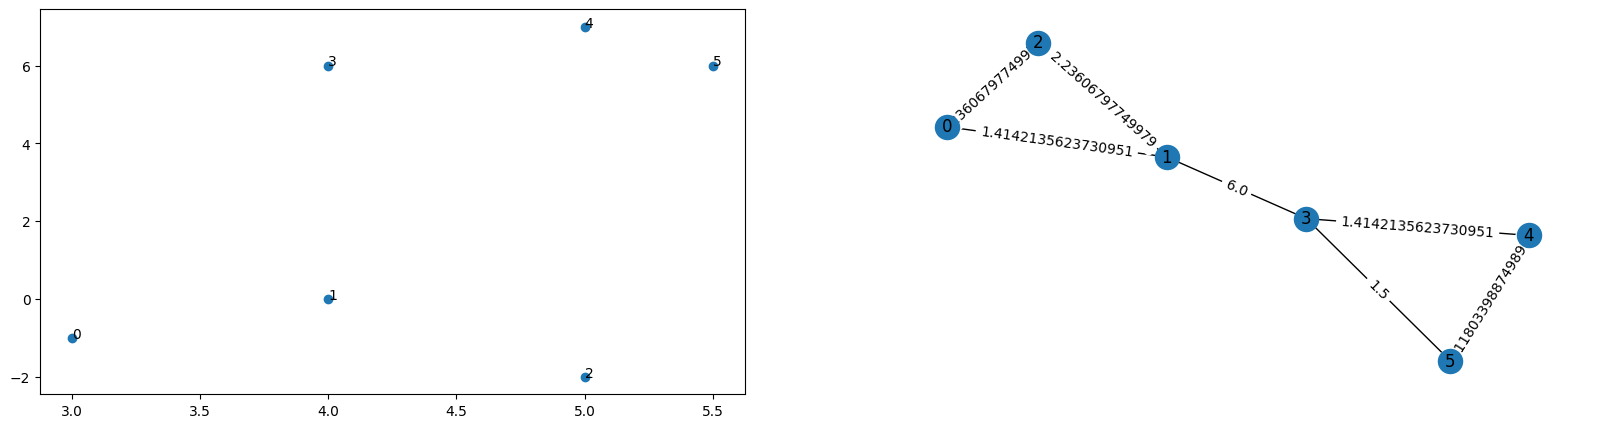

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 5]

import networkx as nx

# draw datapoints
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(data[:, 0], data[:, 1])
for i in range(data.shape[0]):
    ax1.annotate(i, (data[i, 0], data[i, 1]))

graph = graph_building.build_graph(dist)

layout = nx.spring_layout(graph)

nx.draw(graph, pos=layout, ax=ax2, with_labels=True)
labels= nx.get_edge_attributes(graph, 'weight')
_ = nx.draw_networkx_edge_labels(graph, pos=layout, ax=ax2, edge_labels=labels)